In [1]:
from matplotlib import animation
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt
import numpy as np
import numba

In [53]:
@numba.jit('uint8[:,:](uint8[:,:],uint16[:,:])',nopython=True, nogil=True)
def JFA(region, points):
    for i in range(len(region)):
        for j in range(len(region[0])):
            small_d = len(region)**2+len(region[0])**2
            for p in points:
                d = (i-p[0])**2 + (j-p[1])**2
                if d==0:
                    region[i,j] = 256
                    break
                elif d < small_d:
                    small_d = d
                    region[i,j] = p[2]
    return region


In [56]:
width = 2000
n = 10
reg = np.zeros((width,width),dtype = np.uint8)
points = np.zeros((n,3),dtype=np.uint16)
points[:,0] = np.random.randint(width,size=n)
points[:,1] = np.random.randint(width,size=n)
points[:,2] = np.arange(64,256,int((256-64)/n))[:-1]

In [57]:
reg = JFA(reg,points)

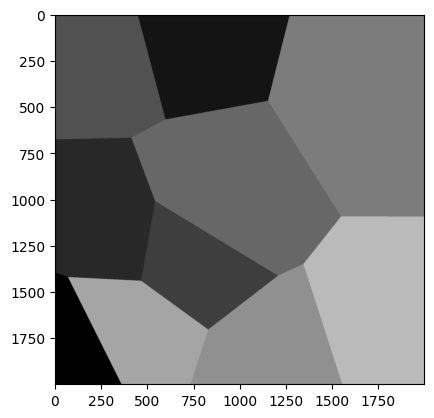

In [58]:
plt.imshow(reg,cmap='binary')